# Doctor's Consultation Fees Prediction.<br>
## Problem Statement:<br>
Predict A Doctor's Consultation Fee. <br>

We have all been in situation where we go to a doctor in emergency and find that the consultation fees are too high. As a data scientist we all should do better. What if you have data that records important details about a doctor and you get to build a model to predict the doctor’s consulting fee.? This is the use case that let's you do that.<br> 

Size of training set: 5961 records.<br>

Size of test set: 1987 records.<br>

## FEATURES:<br>

Qualification: Qualification and degrees held by the doctor.<br>

Experience: Experience of the doctor in number of years.<br>

Rating: Rating given by patients.<br>

Profile: Type of the doctor.<br>

Miscellaneous_Info: Extra information about the doctor.<br>

Fees: Fees charged by the doctor (Target Variable).<br>

Place: Area and the city where the doctor is located.<br>

# IMPORTING DATA AND LIBRARIES.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_excel('Final_Train.xlsx')

In [3]:
train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [4]:
test = pd.read_excel('Final_Test.xlsx')

In [5]:
test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


There are 5961 rows and 7 columns in Training dataset and 1987 rows, 6 columns in Testing dataset.

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


All the columns are object types and only Fees is integer.<br>
There are null values in this data set

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       1987 non-null   object
 1   Experience          1987 non-null   object
 2   Rating              897 non-null    object
 3   Place               1981 non-null   object
 4   Profile             1987 non-null   object
 5   Miscellaneous_Info  1153 non-null   object
dtypes: object(6)
memory usage: 93.3+ KB


All the independent features are object type, rather, are nominal data.<br>
There are null values in this dataset as well.

In [8]:
train.isna().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

There are null values in Rating, Place and Miscellaneous_Info in training dataset

In [9]:
test.isna().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

There are null values in Rating and Miscellaneous_Info in testing datase.

# Let's look at each column (EDA AND PREPROCESSING)

In [10]:
train.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

In [11]:
len(train['Qualification'].unique())

1420

In [12]:
len(test['Qualification'].unique())

630

These are huge number of categories and this needs to be treated in fewer categories. 

In [13]:
len(train['Experience'].unique())

64

In [14]:
len(test['Experience'].unique())

57

We will convert these columns to ordinal data in both columns as the experience value increases with more increase in years.

In [15]:
train['Rating'].value_counts()

100%    684
98%     290
99%     259
97%     241
96%     220
95%     178
94%     115
93%     109
92%      66
90%      66
91%      60
89%      42
88%      41
85%      27
82%      23
83%      21
86%      21
80%      19
77%      16
87%      14
79%      13
84%      13
81%      12
67%      12
76%       9
71%       9
75%       8
73%       8
60%       7
74%       7
78%       6
56%       5
68%       5
70%       4
69%       4
72%       3
57%       3
62%       2
33%       2
63%       2
55%       2
64%       2
48%       1
45%       1
47%       1
65%       1
40%       1
58%       1
7%        1
36%       1
53%       1
Name: Rating, dtype: int64

In [16]:
test['Rating'].value_counts()

100%    223
98%     112
97%      84
99%      68
96%      65
94%      51
95%      47
93%      34
92%      29
90%      29
91%      26
88%      13
87%      11
83%      11
89%      11
82%       9
85%       8
80%       7
84%       7
71%       7
86%       6
67%       5
73%       5
70%       4
76%       4
60%       4
55%       3
81%       3
64%       2
79%       2
69%       2
77%       1
78%       1
53%       1
52%       1
65%       1
Name: Rating, dtype: int64

In [17]:
len(train['Place'].value_counts())

877

In [18]:
len(test['Place'].value_counts())

592

In [19]:
train['Profile'].value_counts()

Dentist             1397
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64

In [20]:
test['Profile'].value_counts()

General Medicine    444
Dentist             441
Dermatologists      339
Homeopath           277
Ayurveda            251
ENT Specialist      235
Name: Profile, dtype: int64

Looking at this column we can use thsi columns and gains more insights out of our data.

In [21]:
train['Fees'].value_counts()

100    1306
500     938
200     904
300     864
400     424
250     307
150     253
600     215
700     153
800     143
350     143
50       81
450      65
750      34
550      22
650      21
900      18
70       18
80       12
60       11
30        4
10        2
260       2
130       2
180       2
40        2
380       2
220       1
280       1
499       1
5         1
920       1
299       1
125       1
230       1
430       1
630       1
850       1
950       1
20        1
Name: Fees, dtype: int64

There is a fees low as 5 and highest as 920.

## Column Qualification

We will try to segregate the Qualifications, choosing the higher degree first and then narrowing down to the lower degree. This will help us to understand if the qualification do matter and ease our work.

In [22]:
# Function to segregate the Qualifications of doctors.
def mbbs(string):
    
    initial = string.replace(',', '')
    final = initial.replace('-','')
    
    lowered = final.lower()
    
    qual_list = ['md','ms','phd','mbbs','bhms','bams','bems','bds', 'doctor','diploma','certifi','fellowship','dnb']
    
    if qual_list[0] in lowered:
        return 'MD'
    elif qual_list[1] in lowered:
        return 'MS'
    elif qual_list[2] in lowered:
        return 'PhD'
    elif qual_list[3] in lowered:
        return 'MBBS'
    elif qual_list[4] in lowered:
        return 'BHMS'
    elif qual_list[5] in lowered:
        return 'BAMS'
    elif qual_list[6] in lowered:
        return 'BEMS'
    elif qual_list[7] in lowered:
        return 'BDS'
    elif qual_list[8] in lowered:
        return 'PhD'
    elif qual_list[9] in lowered:
        return 'Diploma'
    elif qual_list[10] in lowered:
        return 'Certification'
    elif qual_list[11] in lowered:
        return 'Fellowship'
    elif qual_list[12] in lowered:
        return 'DNB'
    else:
        return 'Other'

In [23]:
train['Qual'] = train['Qualification'].apply(mbbs)

In [24]:
train['Qual'].unique()

array(['MD', 'MS', 'BDS', 'MBBS', 'Other', 'PhD', 'Diploma',
       'Certification', 'DNB'], dtype=object)

In [25]:
test['Qual'] = test['Qualification'].apply(mbbs)

In [26]:
test['Qual'].unique()

array(['MBBS', 'MS', 'MD', 'BDS', 'Other', 'PhD', 'Diploma'], dtype=object)

In [27]:
train

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Qual
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,MD
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,MD
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,MS
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,MS
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,MS
...,...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300,MS
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100,MBBS
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,MBBS
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100,MD


## Column Experience

Let's treat the experience column by deducing only the number of years experience.

In [28]:
# function to extract the nnumber of years.
def exp(string):
    years = string.split()[:1]
    year = years[0]
    return year

In [29]:
train['Years'] = train['Experience'].apply(exp)
train['Years'] = train['Years'].astype(int)

In [30]:
test['Years'] = test['Experience'].apply(exp)
test['Years'] = test['Years'].astype(int)

Extracted years of experience for both train and test dataset

<AxesSubplot:xlabel='Years', ylabel='Fees'>

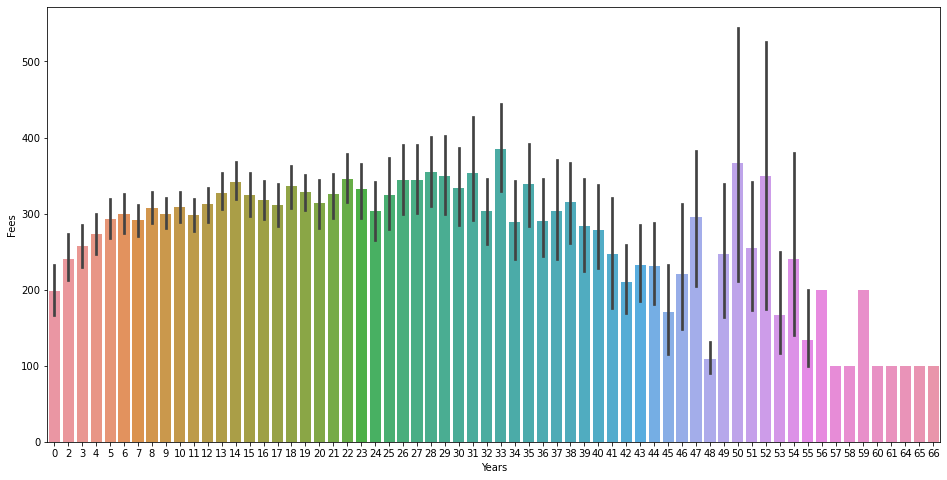

In [31]:
plt.figure(figsize=(16,8))
sns.barplot(train['Years'], train['Fees'])

Number of years may not be that much correlated with the Fees column.

## Column Place

In [32]:
len(train['Place'].value_counts())

877

In [33]:
train.dropna(subset = ['Place'], inplace=True)

In [34]:
train.isna().sum()

Qualification            0
Experience               0
Rating                3277
Place                    0
Profile                  0
Miscellaneous_Info    2595
Fees                     0
Qual                     0
Years                    0
dtype: int64

In [35]:
train

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Qual,Years
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,MD,24
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,MD,12
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,MS,9
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,MS,12
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,MS,20
...,...,...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300,MS,19
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100,MBBS,33
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,MBBS,41
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100,MD,15


So there are multiple places in same city. Let's extract the city name and look at the data.

In [36]:
# function to extract the city name
def city(string):
    last_name = string.split()[-1]
    return last_name

In [37]:
# function to extract the area name
def area(string):
    first_name = string.split()[0]
    return first_name

In [38]:
train['City'] = train['Place'].apply(city)

In [39]:
train['Area'] = train['Place'].apply(area)

In [40]:
train['City'].value_counts()

Bangalore             1258
Mumbai                1219
Delhi                 1185
Hyderabad              951
Chennai                855
Coimbatore             228
Ernakulam              153
Thiruvananthapuram      86
e                        1
Name: City, dtype: int64

So these data are from 8 cites and Banglore seems to be the most frequent city in this column.

In [41]:
train['Area'].value_counts()

Andheri          113
Kandivali         78
HSR               75
Ghatkopar         69
Dwarka,           68
                ... 
Ramamangalam,      1
Jacob              1
Gottigerre,        1
Borabanda,         1
Sindhi             1
Name: Area, Length: 760, dtype: int64

There are 760 area from 8 cities.

<AxesSubplot:xlabel='City', ylabel='Fees'>

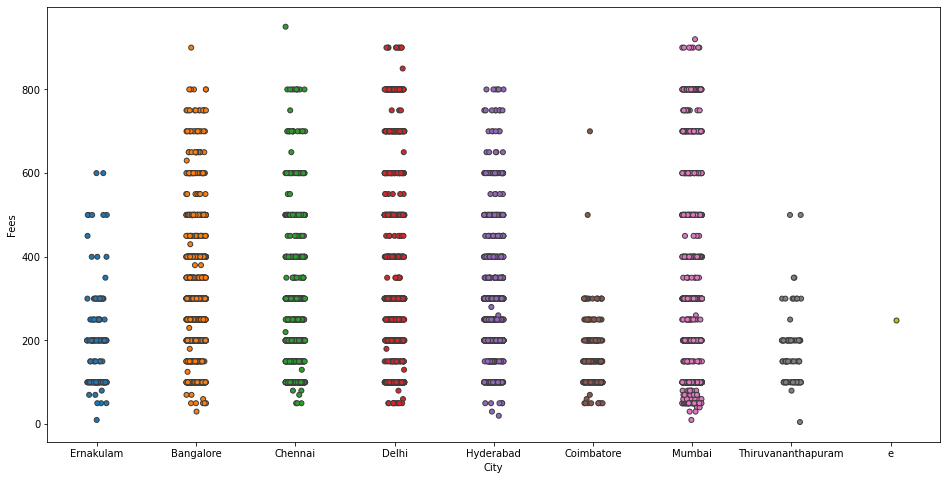

In [42]:
plt.figure(figsize=(16,8))
sns.stripplot(train['City'], train['Fees'], linewidth=1)

1) Most Doctors are from Delhi, Banglore and Mumbai.<br>
2) Thiruvananthapuram has low entries.

We will only include the city column and not Area. As we have other columns that we help differentiate the doctor, with profile, qualification etc.

In [43]:
test[test['Place'].isna()]

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Qual,Years
381,Get inspired by remarkable stories of people l...,0 years experience,NaN,NaN,Dermatologists,NaN,Other,0
1494,Get inspired by remarkable stories of people l...,0 years experience,NaN,NaN,Dermatologists,NaN,Other,0
1644,Get inspired by remarkable stories of people l...,0 years experience,NaN,NaN,Dermatologists,NaN,Other,0
1838,Get inspired by remarkable stories of people l...,0 years experience,NaN,NaN,Dermatologists,NaN,Other,0
1925,Get inspired by remarkable stories of people l...,0 years experience,NaN,NaN,Dermatologists,NaN,Other,0
1930,Get inspired by remarkable stories of people l...,0 years experience,NaN,NaN,Dermatologists,NaN,Other,0


We can remove data from train dataset, however, cannot remove data from test dataset as we are required to submit predicted values for the test data. To treat this we will imput most freequent label to fill the null values.

In [44]:
test['Place'].fillna('Whitefield, Bangalore', inplace=True)

In [45]:
test['Place'].isna().sum()

0

In [46]:
test['City'] = test['Place'].apply(city)

In [47]:
test['City'].value_counts()

Bangalore             426
Delhi                 417
Mumbai                389
Hyderabad             333
Chennai               287
Coimbatore             70
Ernakulam              48
Thiruvananthapuram     17
Name: City, dtype: int64

We will drop the 'e' row in train data as it may be an error.

In [48]:
train[train['City']=='e']

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Qual,Years,City,Area
3980,BDS,23 years experience,NaN,e,Dentist,NaN,250,BDS,23,e,e


In [49]:
train.drop(3980, axis=0, inplace=True)

## Column Rating

In [50]:
train['Rating'].isna().sum()

3276

In [51]:
train['Rating'].fillna('000',inplace=True)

In [52]:
# function to extract the area name
def percent(string):
    first_name = string.replace('%','')
    return first_name

In [53]:
train['Rate'] = train['Rating'].apply(percent)

In [54]:
train['Rate'] = train['Rate'].astype(int)

Created new column for rating and will segregate the ratings into 3 categories.

In [55]:
def rate_div(integer):
    if integer == 0:
        return 0
    if integer<=50: #50 because of max rating is 100
        return 1 #because of the meaningful magnitude
    if integer>50:
        return 2

In [56]:
train['Rate'] = train['Rate'].apply(rate_div)

segregated the ratings into 3 categories. Will do the same with Test data

In [57]:
test['Rating'].isna().sum()

1090

In [58]:
test['Rating'].fillna('000',inplace=True)

In [59]:
test['Rate'] = test['Rating'].apply(percent)

test['Rate'] = test['Rate'].astype(int)

In [60]:
test['Rate'] = test['Rate'].apply(rate_div)

In [61]:
train['Rate'].unique()

array([2, 0, 1], dtype=int64)

In [62]:
test['Rate'].unique()

array([0, 2], dtype=int64)

Done.

<AxesSubplot:xlabel='Rate', ylabel='Fees'>

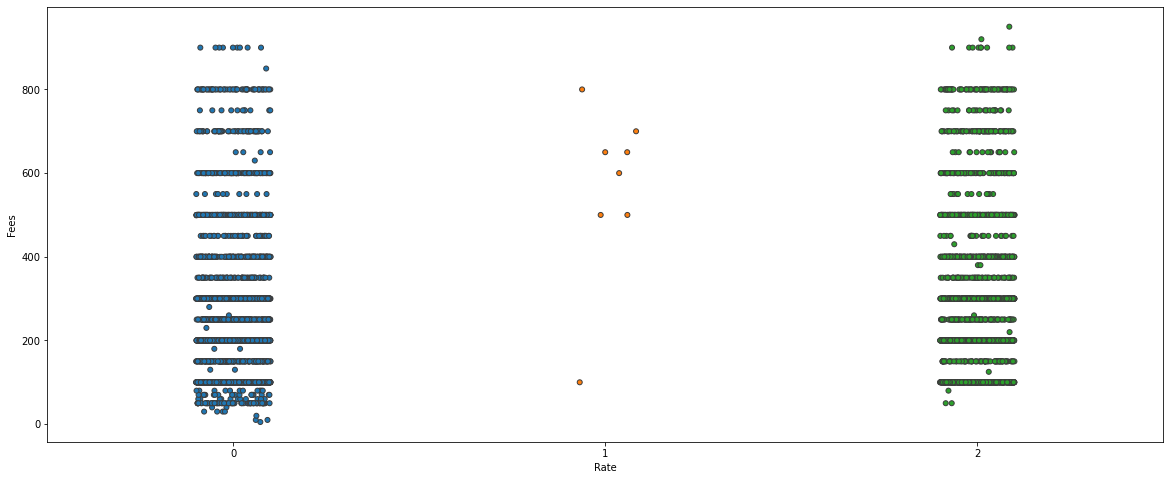

In [63]:
plt.figure(figsize=(20,8))
sns.stripplot(train['Rate'], train['Fees'], linewidth=1)

## Column Profile

<AxesSubplot:xlabel='Profile', ylabel='Fees'>

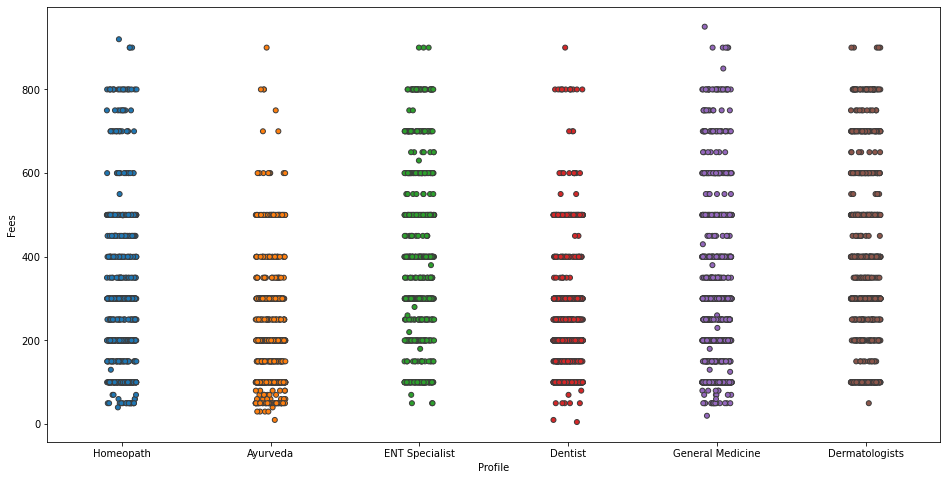

In [64]:
plt.figure(figsize=(16,8))
sns.stripplot(train['Profile'], train['Fees'], linewidth=1)

<AxesSubplot:xlabel='Profile', ylabel='count'>

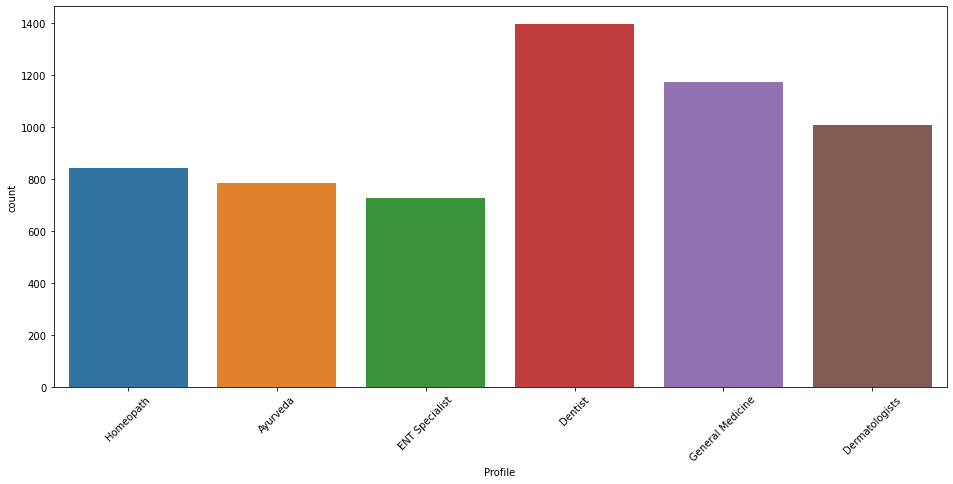

In [65]:
plt.figure(figsize=(16,7))
plt.xticks(rotation=45)
sns.countplot(train['Profile'])

More entries are from 1) Dentists, 2) General Medicine, 3) Dermatologists, 4) Homeopath, 5) Ayurveda and 6) ENT Specialist.

## Column Miscellaneous_Info

There are so many missing values for these columns and we cannot retrive certain information as the data is random. We will drop this column from our model.

# Correlation

<AxesSubplot:>

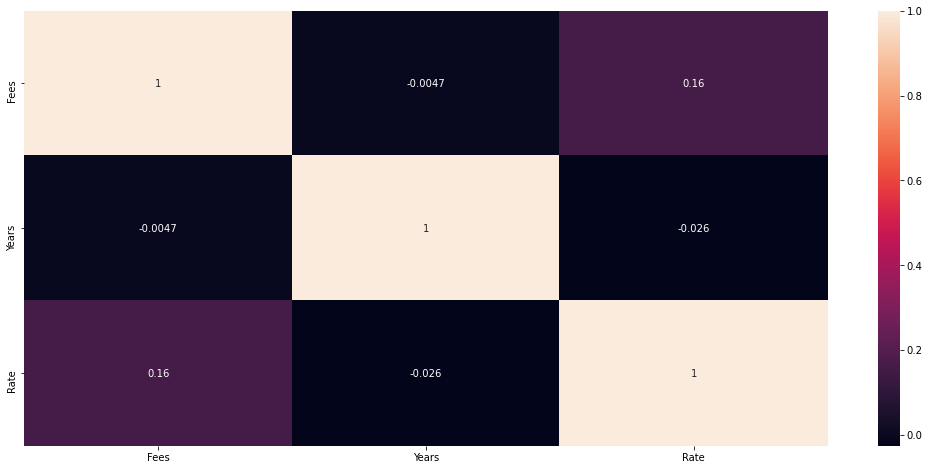

In [66]:
plt.figure(figsize= (18,8))
sns.heatmap(train.corr(), annot = True)

Rating has a very low correlation, same goes with Years(experience)

We will now drop the columns that we used to extact information and created new columns.

Qualification<br>
Experience<br>
Place<br>
Rating<br>
Miscellaneous_Info<br>
These columns must be removed. We will check the columns name in train and test datasets first

In [67]:
train.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees', 'Qual', 'Years', 'City', 'Area', 'Rate'],
      dtype='object')

In [68]:
test.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Qual', 'Years', 'City', 'Rate'],
      dtype='object')

In [69]:
train.drop(['Qualification', 'Experience', 'Rating', 'Place','Miscellaneous_Info', 'Area'], axis=1, inplace=True)

In [70]:
test.drop(['Qualification', 'Experience', 'Rating', 'Place','Miscellaneous_Info'], axis=1, inplace=True)

In [71]:
train.columns

Index(['Profile', 'Fees', 'Qual', 'Years', 'City', 'Rate'], dtype='object')

In [72]:
test.columns

Index(['Profile', 'Qual', 'Years', 'City', 'Rate'], dtype='object')

**Lets transform the columns to pass the data to the model**

## Qual
This column would be a ordinal feature.

In [77]:
train['Qual'].value_counts()

MD               2311
MS               1808
MBBS             1150
BDS               604
PhD                25
Other              24
DNB                 6
Diploma             5
Certification       2
Name: Qual, dtype: int64

In [78]:
train['Qual'] = train['Qual'].map({'MD':8, 'MS':7, 'PhD':6, 'MBBS':5, 'BDS':4, 'Diploma':3,
                                   'Certification':2, 'DNB':1, 'Other':0})

In [79]:
test['Qual'] = test['Qual'].map({'MD':8, 'MS':7, 'PhD':6, 'MBBS':5, 'BDS':4, 'Diploma':3,
                                   'Certification':2, 'DNB':1, 'Other':0})

## Profile and City
We will use one hot encoding for this columns as these are nominal features.

In [80]:
dummies = pd.get_dummies(train[['Profile','City']], drop_first=True)

In [81]:
train.drop(['Profile','City'],axis=1,inplace=True)

In [82]:
train_merge = pd.concat([train,dummies], axis='columns')

In [83]:
train_merge.head()

,Fees,Qual,Years,Rate,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath,City_Chennai,City_Coimbatore,City_Delhi,City_Ernakulam,City_Hyderabad,City_Mumbai,City_Thiruvananthapuram
0,100,8,24,2,0,0,0,0,1,0,0,0,1,0,0,0
1,350,8,12,2,0,0,0,0,0,0,0,0,0,0,0,0
2,300,7,9,0,0,0,1,0,0,0,0,0,0,0,0,0
3,250,7,12,0,0,0,0,0,0,0,0,0,0,0,0,0
4,250,7,20,2,0,0,0,0,0,1,0,0,0,0,0,0


We will follow the same with test data

In [84]:
dummies1 = pd.get_dummies(test[['Profile','City']], drop_first=True)

test.drop(['Profile','City'],axis=1,inplace=True)

test_merge = pd.concat([test,dummies1], axis='columns')

test_merge.head()

,Qual,Years,Rate,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath,City_Chennai,City_Coimbatore,City_Delhi,City_Ernakulam,City_Hyderabad,City_Mumbai,City_Thiruvananthapuram
0,5,35,0,0,0,0,1,0,0,0,0,0,0,1,0
1,5,31,0,0,0,1,0,0,0,0,0,0,1,0,0
2,5,40,2,0,1,0,0,0,1,0,0,0,0,0,0
3,7,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,8,16,2,1,0,0,0,0,0,0,0,0,0,0,0


# Outliers and Skewness

All the features are categorical. So Skewness and Outliers are not an option to treat here.

We will move forward towards model creation

In [85]:
train_merge.columns

Index(['Fees', 'Qual', 'Years', 'Rate', 'Profile_Dentist',
       'Profile_Dermatologists', 'Profile_ENT Specialist',
       'Profile_General Medicine', 'Profile_Homeopath', 'City_Chennai',
       'City_Coimbatore', 'City_Delhi', 'City_Ernakulam', 'City_Hyderabad',
       'City_Mumbai', 'City_Thiruvananthapuram'],
      dtype='object')

In [86]:
x = train_merge.drop(['Fees', 'Years'], axis=1)
y = train_merge['Fees']

Dropping years column as it has lowest correlation

In [87]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x = ss.fit_transform(x)

In [121]:
test_merge.drop('Years', axis=1, inplace=True)

# MODEL BUILDING

## Finding the best random state for the model


In [88]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [89]:
maxAccu = 0
maxRS = 0

for i in range(0,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    accu = r2_score(y_test,pred)
    
    if accu > maxAccu:
        maxAccu = accu
        maxRS = i
print("Best accuracy is",maxAccu,"on random state",maxRS)

Best accuracy is 0.2201836531490623 on random state 189


In [90]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=189)

## Best Algorithm for our problem.

In [91]:
lr = LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print("r2_score:",r2_score(y_test,pred))
print(lr.score(x_train,y_train))

mean_squared_error: 29959.643770572467
mean_absolute_error: 136.8916282470282
r2_score: 0.2201836531490623
0.16322258426582326


In [92]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred = dt.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print("r2_score:",r2_score(y_test,pred))
print(dt.score(x_train,y_train))

mean_squared_error: 30102.31219716641
mean_absolute_error: 135.9861706552899
r2_score: 0.2164701520110166
0.21792537414801783


In [93]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print("r2_score:",r2_score(y_test,pred))
print(rf.score(x_train,y_train))

mean_squared_error: 30077.422846225825
mean_absolute_error: 136.06720037101712
r2_score: 0.21711799425088474
0.21646075856827618


In [94]:
kn = KNeighborsRegressor()
kn.fit(x_train,y_train)
pred = kn.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print("r2_score:",r2_score(y_test,pred))
print(kn.score(x_train,y_train))

mean_squared_error: 38146.16090985678
mean_absolute_error: 148.21314237573716
r2_score: 0.007097678633574911
0.057777823807695694


In [95]:
sv = SVR()
sv.fit(x_train,y_train)
pred = sv.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print("r2_score:",r2_score(y_test,pred))
print(sv.score(x_train,y_train))

mean_squared_error: 34875.53064804002
mean_absolute_error: 142.56141489952452
r2_score: 0.09222856210473507
0.08898047658381647


In [96]:
ab = AdaBoostRegressor()
ab.fit(x_train,y_train)
pred=ab.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print("r2_score:",r2_score(y_test,pred))
print(ab.score(x_train,y_train))

mean_squared_error: 32941.37500454129
mean_absolute_error: 149.24053018031162
r2_score: 0.14257249141526318
0.09898587738681075


In [97]:
gb = GradientBoostingRegressor()
gb.fit(x_train,y_train)
pred=gb.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print("r2_score:",r2_score(y_test,pred))
print(gb.score(x_train,y_train))

mean_squared_error: 29600.95330631301
mean_absolute_error: 136.21139224050418
r2_score: 0.22951996868175295
0.18612134564397165


Linear regression, Random forest, Gradient boosting regressor and Decision Tree regression has good performances.

## Crossvalidation

In [98]:
from sklearn.model_selection import cross_val_score

In [99]:
lrc = cross_val_score(lr, x, y, cv=5)

print("Cross validation score of Linear Regression:", lrc.mean())

Cross validation score of Linear Regression: 0.17148486674599805


In [100]:
rfc = cross_val_score(rf, x, y, cv=5)

print("Cross validation score of Random Forest:", rfc.mean())

Cross validation score of Random Forest: 0.16652625901240878


In [101]:
dtc = cross_val_score(dt, x, y, cv=5)

print("Cross validation score of Decision Tree :", dtc.mean())

Cross validation score of Decision Tree : 0.16393169357649467


In [102]:
knc = cross_val_score(kn, x, y, cv=5)

print("Cross validation score of Kneigbors:", knc.mean())

Cross validation score of Kneigbors: 0.03357622122319266


In [103]:
svc1 = cross_val_score(sv, x, y, cv=5)

print("Cross validation score of Support Vector:", svc1.mean())

Cross validation score of Support Vector: 0.0924013494200651


In [104]:
adr = cross_val_score(ab, x, y, cv=5)

print("Cross validation score of AdaBoost:", adr.mean())

Cross validation score of AdaBoost: 0.09980822188784932


In [105]:
gbr = cross_val_score(gb, x, y, cv=5)

print("Cross validation score of GradientBoost:", gbr.mean())

Cross validation score of GradientBoost: 0.17726089928937186


GradientBoosting Regression has best performance.

## Hyperparameter Tuning

In [109]:
from sklearn.model_selection import RandomizedSearchCV

In [110]:
#Creating parameter list to pass in RandomizedSearchCV

parameters = {'n_estimators':[10,50,100,150], 'max_depth': np.arange(2,10),
             'criterion':['friedman_mse''mse','mae'], 'max_features':['auto','sqrt', 'log2'],
             'loss':['ls','lad','huber','quantile']}

In [111]:
GCV = RandomizedSearchCV(GradientBoostingRegressor(), parameters, cv=5)
GCV.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(),
                   param_distributions={'criterion': ['friedman_msemse', 'mae'],
                                        'loss': ['ls', 'lad', 'huber',
                                                 'quantile'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [10, 50, 100, 150]})

In [112]:
#Printing the best parameters.
GCV.best_params_

{'n_estimators': 10,
 'max_features': 'log2',
 'max_depth': 7,
 'loss': 'huber',
 'criterion': 'mae'}

## Model

In [123]:
model = GradientBoostingRegressor(n_estimators=10, criterion='mae', max_depth=7, max_features='log2', loss='huber')
model.fit(x_train,y_train)
pred = model.predict(test_merge)

In [124]:
pred

array([338.28269892, 280.97453053, 367.76652177, ..., 331.38834265,
       265.01469344, 377.52646579])

# Save the Prediction and model.

In [125]:
import joblib
joblib.dump(model,"Doctor's_Consultation_Fees_Prediction_project_submission.pkl")

["Doctor's_Consultation_Fees_Prediction_project_submission.pkl"]

We saved the model, now we will save our prediction.

In [127]:
pred = pd.DataFrame(pred, columns = ['predictions'])

In [128]:
pred.to_csv('Submission.csv')

Done.